### Plotting physical quantities

This notebook tells you how to plot some physical quantities from the simulation grid for the Matthews et al. 2020 paper "Stratified disc wind models for the AGN broad-line region: ultraviolet, optical and X-ray properties". First let's read in the data using astropy. 

In [1]:
%matplotlib inline
import astropy.io.ascii as asc
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# read in data from run number 52 which is model A from the paper using astropy
root_fname = "physics/run52_thmin70_thmax85_rv1e19_f0p01_r1"
phi_data = asc.read("{}.phi.dat".format(root_fname))
nh_data = asc.read("{}.nh.dat".format(root_fname))
lyman_data = asc.read("{}.lyman.dat".format(root_fname))

The net bit of code makes a scatter plot colour coded by Lyman alpha emissivity 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


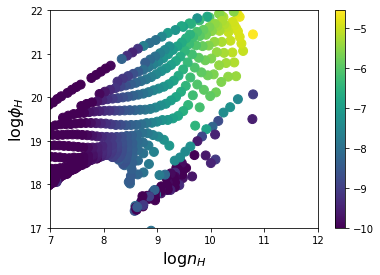

In [5]:
plt.scatter(np.log10(nh_data["var"]), np.log10(phi_data["var"]), c=np.log10(lyman_data["var"]), s=80, vmin=-10)
plt.xlabel("$\log n_H$", fontsize=16)
plt.ylabel("$\log \phi_H$", fontsize=16)
plt.xlim(7,12)
plt.ylim(17,22)
plt.colorbar()

We can also create colour mesh plots of the actual wind grid by reshaping the array and masking the elements not in the wind

In [6]:
def reshape_and_mask(astropy_table, shape=(100,100)):
    mask = (astropy_table["inwind"] < 0)
    x = astropy_table["x"].reshape(shape)
    z = astropy_table["z"].reshape(shape)
    var = np.ma.masked_array(astropy_table["var"].reshape(shape), mask = mask)
    return (x,z,var)

x,z,phi = reshape_and_mask(phi_data)
x,z,nh = reshape_and_mask(nh_data)
x,z,lyman = reshape_and_mask(lyman_data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


[]

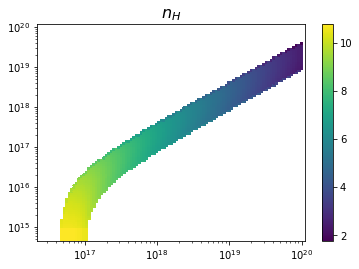

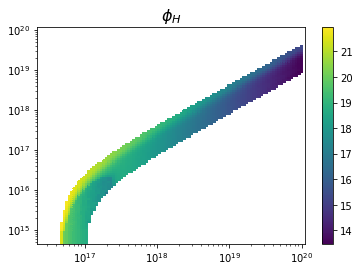

In [7]:
# make the actual plots
# first density 
plt.figure()
plt.pcolormesh(x,z,np.log10(nh))
plt.title("$n_H$", fontsize=16)
plt.colorbar()
plt.loglog()

# then phi_H 
plt.figure()
plt.pcolormesh(x,z,np.log10(phi))
plt.title("$\phi_H$", fontsize=16)
plt.colorbar()
plt.loglog()

Enjoy! Any questions email matthews [at] ast.cam.ac.uk - or if you'd like access to more of the data. 